https://www.kaggle.com/datasets/erdemtaha/cancer-data/data?select=Cancer_Data.csv

**🦠 Breast Cancer Data Set**

This dataset contains the characteristics of patients diagnosed with cancer. The dataset contains a unique ID for each patient, the type of cancer (diagnosis), the visual characteristics of the cancer and the average values of these characteristics.

**📚 The main features of the dataset are as follows:**

**id: Represents a unique ID of each patient.**

**diagnosis: Indicates the type of cancer. This property can take the values "M" (Malignant - Benign) or "B" (Benign - Malignant).**

**radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean:** Represents the mean values of the cancer's visual characteristics.

There are also several categorical features where patients in the dataset are labeled with numerical values. You can examine them in the Chart area.

Other features contain specific ranges of average values of the features of the cancer image:

**radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean**

Each of these features is mapped to a table containing the number of values in a given range. You can examine the Chart Tables

Each sample contains the patient's unique ID, the cancer diagnosis and the average values of the cancer's visual characteristics.

Such a dataset can be used to train or test models and algorithms used to make cancer diagnoses. Understanding and analyzing the dataset can contribute to the improvement of cancer-related visual features and diagnosis.



0 (доброякісні пухлини)

1 (злоякісні пухлини)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

Mounted at /content/drive


In [2]:
path_file = '/content/drive/MyDrive/Colab Notebooks/Colab/Cancer/Cancer_Data.csv'
df_data = pd.read_csv(path_file)

df_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
df_data.shape

(569, 33)

In [4]:
df_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df_data['diagnosis'] = df_data['diagnosis'].map({'M': 1, 'B': 0})


In [7]:
df_data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [8]:
df_data.duplicated().sum()

0

In [9]:
df_data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [10]:
df_data.diagnosis.value_counts()


,count
diagnosis,
0,357
1,212


In [11]:
X = df_data.drop(['diagnosis', 'id', 'Unnamed: 32'],  axis=1)
y = df_data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# ***Random Forest***

In [12]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [13]:
rf_model = RandomForestClassifier(random_state=42)


In [14]:
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)


In [15]:
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [16]:
# best_params and accuracy
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation accuracy for Random Forest:", grid_search_rf.best_score_)

# accuracy_score on test
y_pred_rf = grid_search_rf.predict(X_test)
print("Test accuracy for Random Forest:", accuracy_score(y_test, y_pred_rf))


Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy for Random Forest: 0.9626373626373625
Test accuracy for Random Forest: 0.9649122807017544


# ***Logistic Regression***

In [17]:
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

lr_model = LogisticRegression(random_state=42, max_iter=1000)


In [18]:
# GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)

In [19]:
grid_search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [20]:
# best_params and best_score
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best cross-validation accuracy for Logistic Regression:", grid_search_lr.best_score_)

# accuracy_score on test data
lr_predictions = grid_search_lr.predict(X_test)
print("Test accuracy for Logistic Regression:", accuracy_score(y_test, lr_predictions))

Best parameters for Logistic Regression: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy for Logistic Regression: 0.9670329670329672
Test accuracy for Logistic Regression: 0.9824561403508771


# ***Support Vector Machine (SVM)***

In [21]:
# Params
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

svm = SVC(random_state=42)


In [22]:
# GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, y_train)

# best_params and best_score
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best cross-validation accuracy for SVM:", grid_search_svm.best_score_)

# accuracy_scor on test data
y_pred_svm = grid_search_svm.predict(X_test)
print("Test accuracy for SVM:", accuracy_score(y_test, y_pred_svm))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters for SVM: {'C': 100, 'gamma': 1, 'kernel': 'linear'}
Best cross-validation accuracy for SVM: 0.9604395604395604
Test accuracy for SVM: 0.9473684210526315


# ***Compare Results***

In [23]:
# accuracy_score on test data for each Models
print("Test accuracy for Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Test accuracy for Logistic Regression:", accuracy_score(y_test, lr_predictions))
print("Test accuracy for SVM:", accuracy_score(y_test, y_pred_svm))

# classification_report for best Model
print("Classification report for the best model (Random Forest, Logistic Regression or SVM):")
print(classification_report(y_test, lr_predictions))


Test accuracy for Random Forest: 0.9649122807017544
Test accuracy for Logistic Regression: 0.9824561403508771
Test accuracy for SVM: 0.9473684210526315
Classification report for the best model (Random Forest, Logistic Regression or SVM):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report


In [26]:
model_names = ['Random Forest', 'Logistic Regression', 'SVM']
test_accuracies = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, lr_predictions),
    accuracy_score(y_test, y_pred_svm)
]


<ipython-input-27-34209cca884d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=test_accuracies, palette='viridis')


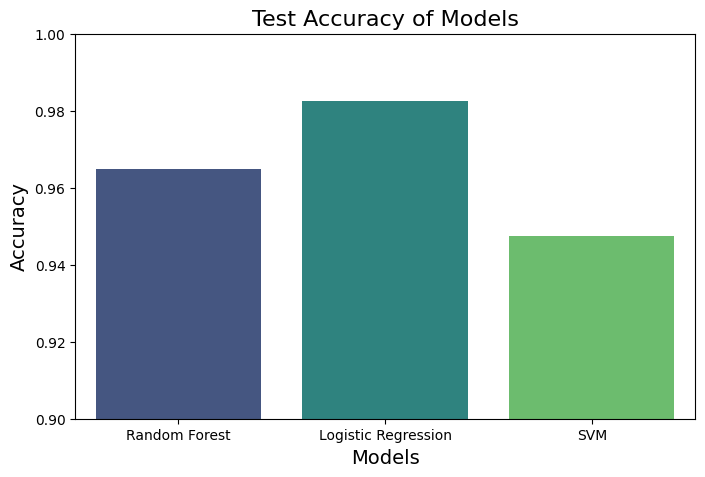

In [27]:
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=test_accuracies, palette='viridis')
plt.title('Test Accuracy of Models', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylim(0.9, 1.0)
plt.show()


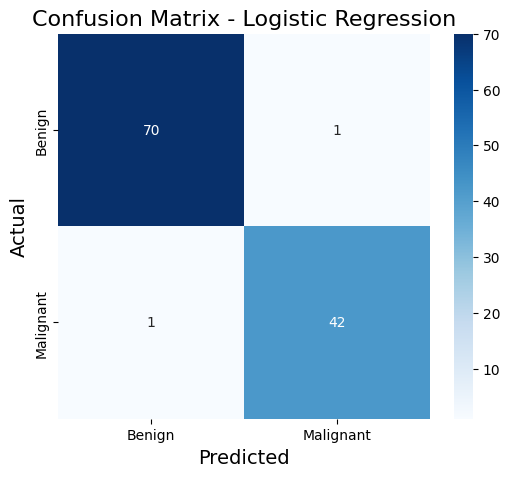

In [28]:
cm = confusion_matrix(y_test, lr_predictions)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Logistic Regression', fontsize=16)
plt.ylabel('Actual', fontsize=14)
plt.xlabel('Predicted', fontsize=14)
plt.show()

# ***Analysis of results and conclusions***


***1. Test accuracy of the models:***

*  **Random Forest**:
 The test accuracy is 0.9649 (96.49%). This indicates that the model performs quite well in classification;

*  **Logistic Regression**:
The test accuracy is 0.9825 (98.25%), which is higher than Random Forest. Logistic regression can handle data better due to its linear resolution;
*   **SVM (Support Vector Machine)**:
 Test accuracy of 0.9474 (94.74%), slightly lower but still decent. Perhaps the hyperparameters for SVM need to be better tuned for better performance.

***2. Score of classification metrics (for the best model):***


*  **Precision** For classes 0 (benign tumours) and 1 (malignant tumours), the accuracy is very high (98-99%), indicating a low number of false positive;
*   **Recall:** The value of 98% for both classes shows that the model recognises all positive examples well (low number of false negatives);

*   **F1-measure:** Close to 0.98 for both classes, indicating a balance between accuracy and completeness;

*  **Overall Accuracy: 98%, which is an excellent result considering that there are 114 examples in the test set.**

***3. Selecting the best model:***

**Based on the test accuracy and the classification report, Logistic Regression is the best model in this case. It has the highest accuracy among all the models.**

***4. Data features:***

*   Data separability: It is highly likely that the data is linearly separable in nature (especially given the high accuracy of Logistic Regression);
*   Class imbalance: There is a slight imbalance between classes 0 and 1 in the dataset (71 vs. 43). The models do a good job of handling this, but additional validation may be needed in real-world settings.

***Summary:***

My models are working well, which shows that the data is of good quality and that I have used the right approach. The best model is logistic regression, which has the highest accuracy.

